In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

pd.options.display.float_format = '{:.0f}'.format

In [2]:
res = pd.read_csv('기웅/아파트 세대 거주기간 정보.csv', encoding = 'cp949')

In [3]:
def gu(x):
    x = x.split(' ')[1]
    return x
res['구'] = res['아파트주소'].apply(gu)


In [4]:
res_jongro = res[res['구'] == '종로구']

In [5]:
res_jongro['아파트주소'].value_counts()

서울특별시 종로구 통일로18길 9       69
서울특별시 종로구 통일로 246-20     51
서울특별시 종로구 사직로8길 4        24
서울특별시 종로구 숭인동길 21        24
서울특별시 종로구 동망산길 47        24
서울특별시 종로구 통일로18길 34      20
서울특별시 종로구 동망산길 19        20
서울특별시 종로구 송월길 130        20
서울특별시 종로구 평창문화로 140      12
서울특별시 종로구 창경궁로 265       12
서울특별시 종로구 지봉로5길 7        12
서울특별시 종로구 평창문화로 172      12
서울특별시 종로구 종로 347          8
서울특별시 종로구 통일로 246-11      8
서울특별시 종로구 돈화문로11가길 59     4
Name: 아파트주소, dtype: int64

In [6]:
res_dict = {
    '서울특별시 종로구 통일로18길 9' : '무악동',
    '서울특별시 종로구 통일로 246-20' : '무악동',
    '서울특별시 종로구 사직로8길 4' : '사직동',
    '서울특별시 종로구 숭인동길 21' : '숭인동',
    '서울특별시 종로구 동망산길 47' : '숭인동',
    '서울특별시 종로구 동망산길 19' : '창신동',
    '서울특별시 종로구 송월길 130' : '행촌동',
    '서울특별시 종로구 통일로18길 34' : '무악동',
    '서울특별시 종로구 창경궁로 265' : '명륜2가',
    '서울특별시 종로구 평창문화로 140' : '평창동',
    '서울특별시 종로구 지봉로5길 7' : '창신동',
    '서울특별시 종로구 평창문화로 172' : '평창동',
    '서울특별시 종로구 통일로 246-11' : '무악동',
    '서울특별시 종로구 종로 347' : '숭인동',
    '서울특별시 종로구 돈화문로11가길 59' : '익선동'
}

In [7]:
def apart_loc(x):
    y = res_dict[x]
    return y
res_jongro['행정동'] = res_jongro['아파트주소'].apply(apart_loc)

<ipython-input-7-82411ea61a05>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_jongro['행정동'] = res_jongro['아파트주소'].apply(apart_loc)


In [8]:
res_jongro['행정동'].value_counts()

무악동     148
숭인동      56
창신동      32
평창동      24
사직동      24
행촌동      20
명륜2가     12
익선동       4
Name: 행정동, dtype: int64

In [9]:
res_jongro.head(5)

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트동명,1년미만거주기간세대수,1년거주기간세대수,2년거주기간세대수,3년거주기간세대수,4년거주기간세대수,5년이상거주기간세대수,합계세대수,Unnamed: 13,구,행정동
6826,201904,서울특별시,3010,삼성,서울특별시 종로구 평창문화로 172,101,13,13,5,5,4,41,86,nan,종로구,평창동
6827,201904,서울특별시,3010,삼성,서울특별시 종로구 평창문화로 172,102,9,7,7,5,4,53,90,nan,종로구,평창동
6828,201904,서울특별시,3010,평창롯데,서울특별시 종로구 평창문화로 140,101,3,6,0,3,1,32,55,nan,종로구,평창동
6829,201904,서울특별시,3010,평창롯데,서울특별시 종로구 평창문화로 140,102,4,5,0,1,0,21,34,nan,종로구,평창동
6830,201904,서울특별시,3010,평창롯데,서울특별시 종로구 평창문화로 140,103,3,6,1,0,2,49,68,nan,종로구,평창동


In [10]:
def month(x):
    x = str(x)
    x = x[:4]
    return x
res_jongro['년'] = res_jongro['기준년월'].apply(month)

<ipython-input-10-0d8e8f5b3834>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_jongro['년'] = res_jongro['기준년월'].apply(month)


## 년/월/ 동별 거주기간 세대수

In [11]:
res_jongro.groupby(['기준년월', '행정동','아파트명'])[['1년미만거주기간세대수', '1년거주기간세대수', '2년거주기간세대수', '3년거주기간세대수', '4년거주기간세대수', '5년이상거주기간세대수', '합계세대수']].mean()

1년미만거주기간세대수  1년거주기간세대수  2년거주기간세대수  3년거주기간세대수  \
기준년월   행정동  아파트명                                                            
201904 명륜2가 명륜아남1차                    12          9          8          9   
       무악동  무악현대                       7          8          7          8   
            무악현대임대                     8          2          4          6   
            인왕산2차아이파크아파트               3          7          3         19   
            인왕산아이파크                    6          6          3          5   
...                                  ...        ...        ...        ...   
202005 창신동  창신두산                      20         13         13         14   
            창신쌍용1단지                   11         13         11          9   
       평창동  평창롯데                       3          3          6          0   
            평창삼성                       6         12          8          6   
       행촌동  경희궁자이1단지(임대아파트)            8         13         71          0   

                             4년거주기간세대수  5년이상거주기간세대수  합계세대수  
기준년월   행정동  아파트명                                            
201904 명륜2가 명륜아남1차                   9           88    145  
       무악동  무악현대                     5           40     81  
            무악현대임대                   6          244    276  
            인왕산2차아이파크아파트             0            0     34  
            인왕산아이파크                  2           24     49  
...                                ...          ...    ...  
202005 창신동  창신두산                    12          103    177  
            창신쌍용1단지                  6           66    117  
       평창동  평창롯데                     1           33     52  
            평창삼성                     4           48     88  
       행촌동  경희궁자이1단지(임대아파트)          0            6     99  

[62 rows x 7 columns]

In [12]:
pd.options.display.max_rows = 63

## 기준 년/동별 거주기간 세대수

In [13]:
res_jongro.groupby(['년', '행정동','아파트명'])[['1년미만거주기간세대수', '1년거주기간세대수', '2년거주기간세대수', '3년거주기간세대수', '4년거주기간세대수', '5년이상거주기간세대수', '합계세대수']].mean()

1년미만거주기간세대수  1년거주기간세대수  2년거주기간세대수  3년거주기간세대수  \
년    행정동  아파트명                                                            
2019 명륜2가 명륜아남1차                    13         10          7          9   
     무악동  무악현대                       7          8          7          8   
          무악현대임대                     8          2          4          6   
          인왕산2차아이파크아파트               3          7          3         19   
          인왕산아이파크                    6          6          4          4   
     사직동  광화문풍림스페이스본                20         19         11          8   
     숭인동  롯데캐슬천지인                    8          8         10          8   
          종로센트레빌                     6         10          9          5   
          종로청계힐스테이트                  5          6          6          5   
     익선동  현대뜨레비앙                    46         32         20         24   
     창신동  창신두산                      15         16         14         14   
          창신쌍용1단지                   15         12         11          7   
     평창동  삼성                        12         10          6          5   
          평창롯데                       3          6          0          1   
          평창삼성                      12         10          6          5   
     행촌동  경희궁자이1단지(임대아파트)           13         74          0          0   
2020 명륜2가 명륜아남1차                    21         12          8          6   
     무악동  무악현대                      10          7          7          6   
          무악현대임대                     6          8          2          4   
          인왕산2차아이파크아파트               5          3          6          2   
          인왕산아이파크                    5          6          5          3   
     사직동  광화문풍림스페이스본                22         18         14         10   
     숭인동  롯데캐슬천지인                    8          8          6         10   
          종로센트레빌                     7          6          9          8   
          종로청계힐스테이트                  6          5          5          5   
     익선동  현대뜨레비앙                    60         36         26         20   
     창신동  창신두산                      19         13         14         13   
          창신쌍용1단지                   11         13         10          9   
     평창동  평창롯데                       4          3          6          0   
          평창삼성                       7         11          8          6   
     행촌동  경희궁자이1단지(임대아파트)            8         12         71          0   

                           4년거주기간세대수  5년이상거주기간세대수  합계세대수  
년    행정동  아파트명                                            
2019 명륜2가 명륜아남1차                   9           88    145  
     무악동  무악현대                     5           40     80  
          무악현대임대                   6          244    275  
          인왕산2차아이파크아파트             0            0     34  
          인왕산아이파크                  3           24     48  
     사직동  광화문풍림스페이스본               7           49    124  
     숭인동  롯데캐슬천지인                  5           67    110  
          종로센트레빌                   6           31     69  
          종로청계힐스테이트                4           19     48  
     익선동  현대뜨레비앙                  14          116    291  
     창신동  창신두산                    10           99    176  
          창신쌍용1단지                  8           58    117  
     평창동  삼성                       4           47     88  
          평창롯데                     1           34     52  
          평창삼성                     4           47     88  
     행촌동  경희궁자이1단지(임대아파트)          0           10    100  
2020 명륜2가 명륜아남1차                   8           90    145  
     무악동  무악현대                     7           43     80  
          무악현대임대                   6          250    278  
          인왕산2차아이파크아파트            17            0     33  
          인왕산아이파크                  4           24     48  
     사직동  광화문풍림스페이스본               7           53    124  
     숭인동  롯데캐슬천지인                  6           69    110  
          종로센트레빌                   5           34     69  
          종로청계힐스테

In [14]:
apart_price = pd.read_csv('기웅/아파트 일반정보 및 시세.csv', encoding ='cp949')

In [16]:
def gu(x):
    gu = x.split(' ')[1]
    return gu
apart_price['구'] = apart_price['아파트주소'].apply(gu)

In [17]:
apart_price['구'].value_counts()

수성구    11274
달서구    10541
북구      8129
동구      5755
원주시     4815
강릉시     2868
춘천시     2757
중구      1624
동해시     1619
서구      1538
남구      1501
속초시     1481
종로구     1215
삼척시      631
태백시      501
Name: 구, dtype: int64

In [18]:
jongro_apart_price = apart_price[apart_price['구'] == '종로구']

In [19]:
jongro_apart_price.head(5)

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근매매실거래일자,...,최근전세실거래일자,매매하위평균가격,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격,시세기준일자,Unnamed: 19,구
3,201904,서울특별시,3075,아남3,서울특별시 종로구 혜화로3길 5,28,1,50,540000000,20181029,...,20181030,470000000,480000000,490000000,350000000,365000000,380000000,20190408,nan,종로구
4,201904,서울특별시,3107,종로센트레빌,서울특별시 종로구 동망산길 47,180,6,60,700000000,20180825,...,20190330,620000000,640000000,660000000,380000000,395000000,410000000,20190408,nan,종로구
5,201904,서울특별시,3107,종로센트레빌,서울특별시 종로구 동망산길 47,72,6,115,850000000,20180826,...,20181128,840000000,860000000,880000000,520000000,530000000,540000000,20190408,nan,종로구
6,201904,서울특별시,3107,종로센트레빌,서울특별시 종로구 동망산길 47,164,6,85,800000000,20180912,...,20190322,750000000,775000000,800000000,440000000,460000000,480000000,20190408,nan,종로구
7,201904,서울특별시,3113,롯데캐슬천지인,서울특별시 종로구 종로 347,110,2,85,722000000,20180718,...,20190311,690000000,720000000,750000000,500000000,525000000,550000000,20190408,nan,종로구


In [20]:
jongro_apart_price['우편번호'].value_counts()

3168    187
3174    127
3024    119
3010    110
3075    102
3092     85
3132     77
3130     68
3112     51
3107     51
3095     51
3093     51
3025     51
3113     34
3104     34
3121     17
Name: 우편번호, dtype: int64

### 우편번호에 해당되는 동을 찾기 위해 우편번호 : ~동 딕셔너리를 만듬
#### 실제 검색해서 넣었음

In [21]:
dong_dict = {
    '서울특별시 종로구 사직로8길 4' : '사직동',
    '서울특별시 종로구 혜화로3길 5' : '명륜2가',
    '서울특별시 종로구 낙산길 198' : '창신동',
    '서울특별시 종로구 돈화문로11가길 59' : '익선동',
    '서울특별시 종로구 평창문화로 140' : '평창동',
    '서울특별시 종로구 통일로18길 9' : '무악동',
    '서울특별시 종로구 종로 183' : '인의동',
    '서울특별시 종로구 동망산길 47' : '숭인동',
    '서울특별시 종로구 사직로8길 34' : '내수동',
    '서울특별시 종로구 숭인동길 21' : '숭인동',
    '서울특별시 종로구 통일로 246-20' : '무악동',
    '서울특별시 종로구 동망산길 19' : '창신동',
    '서울특별시 종로구 통일로18길 34' : '무악동',
    '서울특별시 종로구 지봉로 87' : '창신동',
    '서울특별시 종로구 사직로8길 20' : '내수동',
    '서울특별시 종로구 새문안로3길 23' : '내수동',
    '서울특별시 종로구 종로 347' : '숭인동',
    '서울특별시 종로구 지봉로5길 7' : '창신동',
    '서울특별시 종로구 평창문화로 172' : '평창동',
    '서울특별시 종로구 지봉로 25' : '창신동',
    '서울특별시 종로구 창경궁로 265' : '명륜2가'
}

In [22]:
def dong(x):
    y = dong_dict[x]
    return y
jongro_apart_price['동'] = jongro_apart_price['아파트주소'].apply(dong)

<ipython-input-22-e231246ea9f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jongro_apart_price['동'] = jongro_apart_price['아파트주소'].apply(dong)


In [23]:
def year(x):
    year = str(x)[:4]
    return year
jongro_apart_price['년'] = jongro_apart_price['기준년월'].apply(year)

<ipython-input-23-1089eb3a98e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jongro_apart_price['년'] = jongro_apart_price['기준년월'].apply(year)


In [24]:
jongro_apart_price.columns

Index(['기준년월', '매매지역명', '우편번호', '아파트명', '아파트주소', '아파트세대수', '아파트동수', '아파트면적값',
       '최근매매실거래가격', '최근매매실거래일자', '최근전세실거래가격', '최근전세실거래일자', '매매하위평균가격',
       '매매일반평균가격', '매매상위평균가격', '전세하위평균가격', '전세일반평균가격', '전세상위평균가격', '시세기준일자',
       'Unnamed: 19', '구', '동', '년'],
      dtype='object')

In [25]:
jongro_apart_price.head(5)

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근매매실거래일자,...,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격,시세기준일자,Unnamed: 19,구,동,년
3,201904,서울특별시,3075,아남3,서울특별시 종로구 혜화로3길 5,28,1,50,540000000,20181029,...,480000000,490000000,350000000,365000000,380000000,20190408,nan,종로구,명륜2가,2019
4,201904,서울특별시,3107,종로센트레빌,서울특별시 종로구 동망산길 47,180,6,60,700000000,20180825,...,640000000,660000000,380000000,395000000,410000000,20190408,nan,종로구,숭인동,2019
5,201904,서울특별시,3107,종로센트레빌,서울특별시 종로구 동망산길 47,72,6,115,850000000,20180826,...,860000000,880000000,520000000,530000000,540000000,20190408,nan,종로구,숭인동,2019
6,201904,서울특별시,3107,종로센트레빌,서울특별시 종로구 동망산길 47,164,6,85,800000000,20180912,...,775000000,800000000,440000000,460000000,480000000,20190408,nan,종로구,숭인동,2019
7,201904,서울특별시,3113,롯데캐슬천지인,서울특별시 종로구 종로 347,110,2,85,722000000,20180718,...,720000000,750000000,500000000,525000000,550000000,20190408,nan,종로구,숭인동,2019


## 지역간 가격을 비교하기 위해 평당 가격을 구해보았다

In [26]:
jongro_apart_price.drop(['매매지역명', '아파트세대수', '아파트동수'], axis = 1, inplace = True) # 필요없는 컬럼들은 삭제

C:\Users\msi\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
jongro_apart_price.drop('Unnamed: 19', axis = 1, inplace = True) # 필요없는 컬럼들은 삭제

In [28]:
jongro_apart_price.drop('구', axis = 1, inplace = True) # 필요없는 컬럼들은 삭제

In [29]:
jongro_apart_price.index = range(len(jongro_apart_price)) # 인덱스 재설정

In [33]:
jongro_apart_price['평당 전세가'] = ''
jongro_apart_price['평당 매매가'] = ''

def sqrprice(x, y):
    # x : 평
    # y : 가격
    return y/x

for i in range(len(jongro_apart_price)): # 평당 전세가
    jongro_apart_price['평당 전세가'][i] = sqrprice(jongro_apart_price['아파트면적값'][i], jongro_apart_price['전세일반평균가격'][i])
    
    
for i in range(len(jongro_apart_price)): # 평당 매매가
    jongro_apart_price['평당 매매가'][i] = sqrprice(jongro_apart_price['아파트면적값'][i], jongro_apart_price['매매일반평균가격'][i])

<ipython-input-33-8aa150d4b810>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jongro_apart_price['평당 전세가'] = ''
<ipython-input-33-8aa150d4b810>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jongro_apart_price['평당 매매가'] = ''
<ipython-input-33-8aa150d4b810>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jongro_apart_

In [59]:
jongro_apart_price['아파트명'].value_counts()

광화문풍림스페이스본(9-0)    187
아남3                 85
창신쌍용2               85
현대뜨레비앙              77
롯데낙천대               76
효성쥬얼리시티             68
인왕산아이파크             68
경희궁의아침3단지           51
종로청계힐스테이트           51
현대                  51
창신쌍용1               51
종로센트레빌              51
인왕산2차아이파크           51
창신이수                51
파크팰리스               42
두산                  34
삼성                  34
경희궁의아침4단지           34
롯데캐슬천지인             34
아남1                 17
동대문                 17
Name: 아파트명, dtype: int64

In [56]:
anam = jongro_apart_price[jongro_apart_price['아파트명'] == '아남3']

In [58]:
anam[anam['기준년월'] == 201904]

,기준년월,우편번호,아파트명,아파트주소,아파트면적값,최근매매실거래가격,최근매매실거래일자,최근전세실거래가격,최근전세실거래일자,매매하위평균가격,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격,시세기준일자,동,년,평당 전세가,평당 매매가
0,201904,3075,아남3,서울특별시 종로구 혜화로3길 5,50,540000000,20181029,400000000,20181030,470000000,480000000,490000000,350000000,365000000,380000000,20190408,명륜2가,2019,7229154,9506833
27,201904,3075,아남3,서울특별시 종로구 혜화로3길 5,66,650000000,20190114,480000000,20180116,600000000,625000000,650000000,450000000,465000000,480000000,20190408,명륜2가,2019,7069017,9501368
28,201904,3075,아남3,서울특별시 종로구 혜화로3길 5,95,600000000,20170327,480000000,20180714,700000000,725000000,750000000,550000000,555000000,560000000,20190408,명륜2가,2019,5850727,7642842
29,201904,3075,아남3,서울특별시 종로구 혜화로3길 5,44,478000000,20181103,310000000,20170805,450000000,465000000,480000000,320000000,325000000,330000000,20190408,명륜2가,2019,7324768,10480054
30,201904,3075,아남3,서울특별시 종로구 혜화로3길 5,47,459000000,20180309,300000000,20190301,470000000,475000000,480000000,350000000,360000000,370000000,20190408,명륜2가,2019,7590132,10014758
149,201904,3075,아남3,서울특별시 종로구 혜화로3길 5,50,540000000,20181029,400000000,20181030,470000000,480000000,490000000,350000000,365000000,380000000,20190422,명륜2가,2019,7229154,9506833
150,201904,3075,아남3,서울특별시 종로구 혜화로3길 5,47,459000000,20180309,300000000,20190301,470000000,475000000,480000000,350000000,360000000,370000000,20190422,명륜2가,2019,7590132,10014758
151,201904,3075,아남3,서울특별시 종로구 혜화로3길 5,44,478000000,20181103,310000000,20170805,450000000,465000000,480000000,320000000,325000000,330000000,20190422,명륜2가,2019,7324768,10480054
152,201904,3075,아남3,서울특별시 종로구 혜화로3길 5,95,600000000,20170327,480000000,20180714,700000000,725000000,750000000,550000000,555000000,560000000,20190422,명륜2가,2019,5850727,7642842
153,201904,3075,아남3,서울특별시 종로구 혜화로3길 5,66,650000000,20190114,480000000,20180116,600000000,625000000,650000000,450000000,465000000,480000000,20190422,명륜2가,2019,7069017,9501368


In [35]:
jongro_apart_price['동'].value_counts()

창신동     238
사직동     187
무악동     170
숭인동     136
내수동     127
평창동     110
명륜2가    102
익선동      77
인의동      68
Name: 동, dtype: int64

In [36]:
jongro_apart_price['평당 전세가'] = jongro_apart_price['평당 전세가'].astype(int) # object로 돼잇어서 int로 만듬
jongro_apart_price['평당 매매가'] = jongro_apart_price['평당 매매가'].astype(int)

<ipython-input-36-bdc0a334e9a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jongro_apart_price['평당 전세가'] = jongro_apart_price['평당 전세가'].astype(int) # object로 돼잇어서 int로 만듬
<ipython-input-36-bdc0a334e9a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jongro_apart_price['평당 매매가'] = jongro_apart_price['평당 매매가'].astype(int)


In [37]:
jongro_sqr_price = jongro_apart_price.groupby(['년', '동'], as_index = False).agg({'평당 전세가' : 'mean', '평당 매매가' : 'mean'})
jongro_sqr_price

,년,동,평당 전세가,평당 매매가
0,2019,내수동,5812300,8956376
1,2019,명륜2가,6927929,9447050
2,2019,무악동,6341623,9261187
3,2019,사직동,5997329,8417509
4,2019,숭인동,5711057,8732037
5,2019,익선동,4755845,6378013
6,2019,인의동,5526268,7592211
7,2019,창신동,4309232,7399576
8,2019,평창동,4180529,6190977
9,2020,내수동,6973724,10685607


In [38]:
jongro_sqr_price1 = jongro_sqr_price[jongro_sqr_price['년'] == '2019']
jongro_sqr_price2 = jongro_sqr_price[jongro_sqr_price['년'] == '2020']
jongro_sqr_price = pd.merge(jongro_sqr_price1, jongro_sqr_price2, on = '동')

In [39]:
jongro_sqr_price

,년_x,동,평당 전세가_x,평당 매매가_x,년_y,평당 전세가_y,평당 매매가_y
0,2019,내수동,5812300,8956376,2020,6973724,10685607
1,2019,명륜2가,6927929,9447050,2020,7203546,10823153
2,2019,무악동,6341623,9261187,2020,6756115,11074957
3,2019,사직동,5997329,8417509,2020,6465170,10128214
4,2019,숭인동,5711057,8732037,2020,5952182,9485305
5,2019,익선동,4755845,6378013,2020,5502096,7081464
6,2019,인의동,5526268,7592211,2020,5661568,7973461
7,2019,창신동,4309232,7399576,2020,4469171,8096073
8,2019,평창동,4180529,6190977,2020,4624174,6852260


In [40]:
jongro_sqr_price['전세가 증감률'] = ''
jongro_sqr_price['매매가 증감률'] = ''
for i in range(len(jongro_sqr_price)):
    a = jongro_sqr_price['평당 전세가_x'][i]
    b = jongro_sqr_price['평당 전세가_y'][i]
    jongro_sqr_price['전세가 증감률'][i] = (b-a)/a * 100
    
    c = jongro_sqr_price['평당 매매가_x'][i]
    d = jongro_sqr_price['평당 매매가_y'][i]
    jongro_sqr_price['매매가 증감률'][i] = (d-c)/c * 100

<ipython-input-40-7a96f7f123c8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jongro_sqr_price['전세가 증감률'][i] = (b-a)/a * 100
<ipython-input-40-7a96f7f123c8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jongro_sqr_price['매매가 증감률'][i] = (d-c)/c * 100


# 전세가/ 매매가 평당가로 비교한 증감률

In [41]:
jongro_sqr_price

,년_x,동,평당 전세가_x,평당 매매가_x,년_y,평당 전세가_y,평당 매매가_y,전세가 증감률,매매가 증감률
0,2019,내수동,5812300,8956376,2020,6973724,10685607,20,19
1,2019,명륜2가,6927929,9447050,2020,7203546,10823153,4,15
2,2019,무악동,6341623,9261187,2020,6756115,11074957,7,20
3,2019,사직동,5997329,8417509,2020,6465170,10128214,8,20
4,2019,숭인동,5711057,8732037,2020,5952182,9485305,4,9
5,2019,익선동,4755845,6378013,2020,5502096,7081464,16,11
6,2019,인의동,5526268,7592211,2020,5661568,7973461,2,5
7,2019,창신동,4309232,7399576,2020,4469171,8096073,4,9
8,2019,평창동,4180529,6190977,2020,4624174,6852260,11,11


<ipython-input-42-5dbadbeec088>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


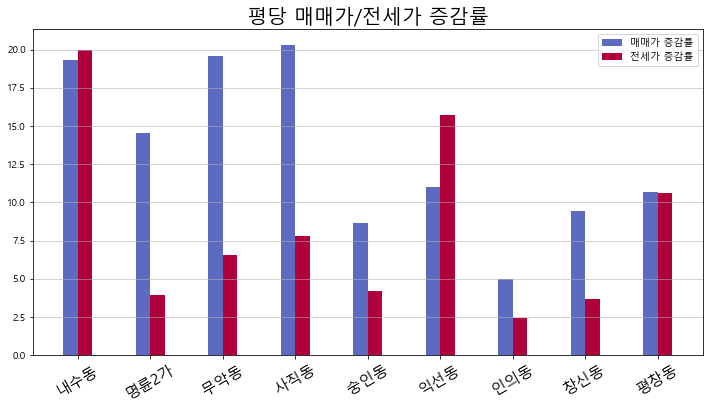

In [42]:
plt.figure(figsize = (12,6))

x = np.arange(len(jongro_sqr_price))

plt.bar(x - 0.1, jongro_sqr_price['매매가 증감률'],width = 0.2, color = '#5c6bc0', label = '매매가 증감률')
plt.bar(x + 0.1, jongro_sqr_price['전세가 증감률'], width = 0.2, color = '#b0003a', label = '전세가 증감률')
ax = plt.subplot()
ax.set_xticks(range(len(jongro_sqr_price)))
ax.set_xticklabels(jongro_sqr_price['동'], fontsize = 15, rotation = 30)
plt.legend()
plt.grid(axis = 'y', alpha = 0.7)
plt.title('평당 매매가/전세가 증감률', fontsize = 20)
# plt.savefig('평당 매매가전세가 증감률.png')
plt.show()

<ipython-input-43-1a5547e82c73>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


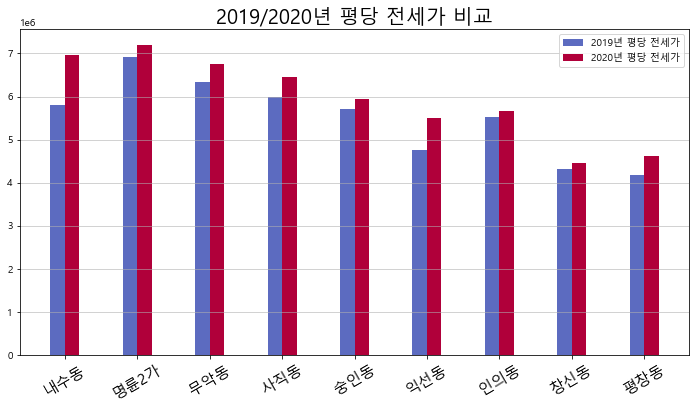

In [43]:
plt.figure(figsize = (12,6))

x = np.arange(len(jongro_sqr_price))

plt.bar(x - 0.1, jongro_sqr_price['평당 전세가_x'],width = 0.2, color = '#5c6bc0', label = '2019년 평당 전세가')
plt.bar(x + 0.1, jongro_sqr_price['평당 전세가_y'], width = 0.2, color = '#b0003a', label = '2020년 평당 전세가')
ax = plt.subplot()
ax.set_xticks(range(len(jongro_sqr_price)))
ax.set_xticklabels(jongro_sqr_price['동'], fontsize = 15, rotation = 30)
plt.legend()
plt.grid(axis = 'y', alpha = 0.7)
plt.title('2019/2020년 평당 전세가 비교', fontsize = 20)
# plt.savefig('20192020년 평당 전세가 비교.png')
plt.show()

<ipython-input-44-4e3ec0c1c43a>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


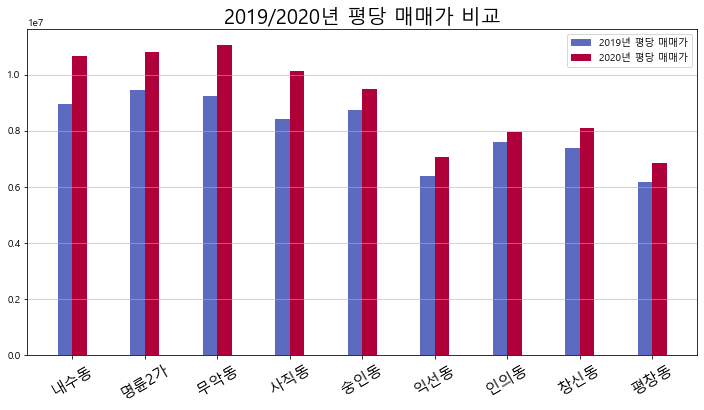

In [44]:
plt.figure(figsize = (12,6))

x = np.arange(len(jongro_sqr_price))

plt.bar(x - 0.1, jongro_sqr_price['평당 매매가_x'],width = 0.2, color = '#5c6bc0', label = '2019년 평당 매매가')
plt.bar(x + 0.1, jongro_sqr_price['평당 매매가_y'], width = 0.2, color = '#b0003a', label = '2020년 평당 매매가')
ax = plt.subplot()
ax.set_xticks(range(len(jongro_sqr_price)))
ax.set_xticklabels(jongro_sqr_price['동'], fontsize = 15, rotation = 30)
plt.legend()
plt.grid(axis = 'y', alpha = 0.7)
plt.title('2019/2020년 평당 매매가 비교', fontsize = 20)
# plt.savefig('20192020년 평당 매매가 비교.png')
plt.show()